### Read dataset

dataset credit : https://huggingface.co/datasets/google-research-datasets/go_emotions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.utils import resample
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\afiya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_parquet("hf://datasets/google-research-datasets/go_emotions/raw/train-00000-of-00001.parquet")

In [3]:
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float32
 7   rater_id              211225 non-null  int32  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int32  
 10  amusement             211225 non-null  int32  
 11  anger                 211225 non-null  int32  
 12  annoyance             211225 non-null  int32  
 13  approval              211225 non-null  int32  
 14  caring                211225 non-null  int32  
 15  

### Selecting Necessary Features/Columns

In [5]:
selected_df = df[['text', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral']]
selected_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Looking at some Texts

In [6]:
sample_df = selected_df.sample(n=15, random_state=0)
for text in sample_df['text']:
    print(text)
    print()

No kidding, this dude is trying to drown some serious demons.

I'm hoping it turns out and theres something of value but these type of things spark up from time to time so time will tell.

At least it's not a T bone

At the time it was a steal, and all the players we traded have basically been worst case scenario for the A's.

Same philosophy makes women stay with men who beat them daily

Just gonna say it. Bahahahahahaha

I should've left after the first period ended. That was brutal.

[NAME] Almighty. This may be the most empathetic and compassionate reddit thread I've ever seen! Who ever said drunks were mean? Terrible stereotype.

The poor dude.....pray for him.

Contractions is equivalent....body can only deal with...us women with labor.....I don’t like the way this person speaks.

Omg is this that what older kids call s*x?1?1??1??

It's not just me that has enemies for life then...

I don't think any game mode has a guarantee anymore. I five stacked last night in unranked and wai

In [7]:
selected_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
text,211225,57732,Thank you.,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admiration,211225.0,NaN,NaN,NaN,0.081103,0.272994,0.0,0.0,0.0,0.0,1.0
amusement,211225.0,NaN,NaN,NaN,0.043768,0.20458,0.0,0.0,0.0,0.0,1.0
anger,211225.0,NaN,NaN,NaN,0.038272,0.191853,0.0,0.0,0.0,0.0,1.0
annoyance,211225.0,NaN,NaN,NaN,0.064472,0.245592,0.0,0.0,0.0,0.0,1.0
approval,211225.0,NaN,NaN,NaN,0.083418,0.276514,0.0,0.0,0.0,0.0,1.0
caring,211225.0,NaN,NaN,NaN,0.028401,0.166116,0.0,0.0,0.0,0.0,1.0
confusion,211225.0,NaN,NaN,NaN,0.03484,0.183374,0.0,0.0,0.0,0.0,1.0
curiosity,211225.0,NaN,NaN,NaN,0.045885,0.209236,0.0,0.0,0.0,0.0,1.0
desire,211225.0,NaN,NaN,NaN,0.018071,0.133208,0.0,0.0,0.0,0.0,1.0


### Dropping Duplicated Text

In [8]:
removed_duplicated_df = selected_df.drop_duplicates(subset=['text'])
removed_duplicated_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
text,57732,57732,That game hurt.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admiration,57732.0,NaN,NaN,NaN,0.083766,0.27704,0.0,0.0,0.0,0.0,1.0
amusement,57732.0,NaN,NaN,NaN,0.045729,0.208898,0.0,0.0,0.0,0.0,1.0
anger,57732.0,NaN,NaN,NaN,0.038315,0.191957,0.0,0.0,0.0,0.0,1.0
annoyance,57732.0,NaN,NaN,NaN,0.060123,0.237716,0.0,0.0,0.0,0.0,1.0
approval,57732.0,NaN,NaN,NaN,0.083801,0.277092,0.0,0.0,0.0,0.0,1.0
caring,57732.0,NaN,NaN,NaN,0.027472,0.163455,0.0,0.0,0.0,0.0,1.0
confusion,57732.0,NaN,NaN,NaN,0.034539,0.18261,0.0,0.0,0.0,0.0,1.0
curiosity,57732.0,NaN,NaN,NaN,0.04798,0.213726,0.0,0.0,0.0,0.0,1.0
desire,57732.0,NaN,NaN,NaN,0.017547,0.131297,0.0,0.0,0.0,0.0,1.0


#### Check for missing values

In [9]:
selected_df.isnull().sum()

text              0
admiration        0
amusement         0
anger             0
annoyance         0
approval          0
caring            0
confusion         0
curiosity         0
desire            0
disappointment    0
disapproval       0
disgust           0
embarrassment     0
excitement        0
fear              0
gratitude         0
grief             0
joy               0
love              0
nervousness       0
optimism          0
pride             0
realization       0
relief            0
remorse           0
sadness           0
surprise          0
neutral           0
dtype: int64

#### Count the Total Occurrences of Each Emotion

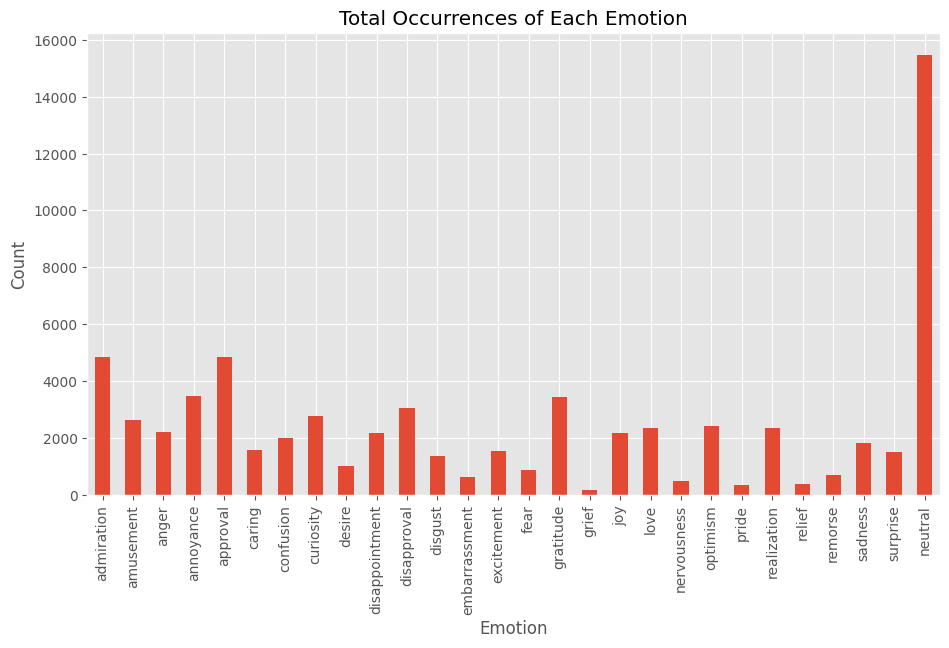

In [10]:
emotion_count = removed_duplicated_df.iloc[:, 1:].sum()
plt.figure(figsize=(11,6))
plt.style.use('ggplot')
emotion_count.plot(kind='bar')
plt.title('Total Occurrences of Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

#### Correlations Between Emotions

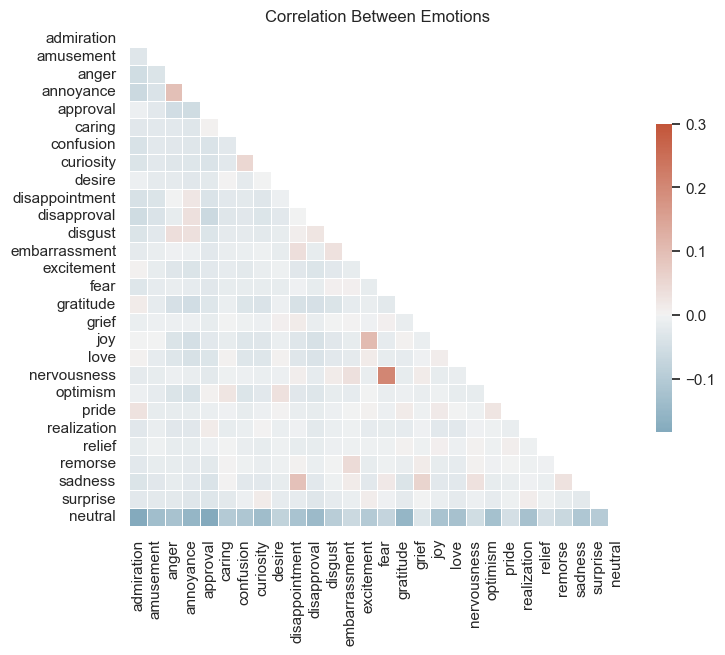

In [11]:
sns.set_theme(style="white")

# Calculate correlation matrix for emotions
correlation_matrix = removed_duplicated_df.iloc[:, 1:29].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.title('Correlation Between Emotions')
plt.show()


#### Determine how often multiple emotions are assigned to the same text

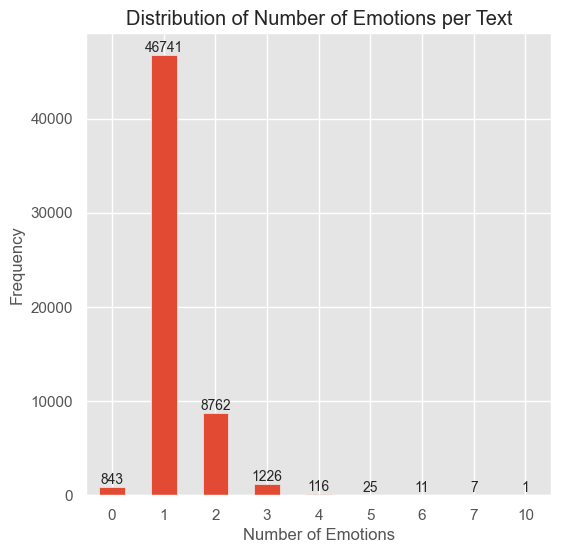

In [12]:
# Plot the distribution of the number of emotions
plt.figure(figsize=(6, 6))
plt.style.use('ggplot')
emotion_counts = removed_duplicated_df.iloc[:, 1:29].sum(axis=1).value_counts().sort_index()  # Calculate the distribution
ax = emotion_counts.plot(kind='bar')

# Add annotations on top of each bar
for i, count in enumerate(emotion_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Customize the chart
plt.title('Distribution of Number of Emotions per Text')
plt.xlabel('Number of Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Ensure labels are horizontal
plt.show()


## There are 843 some text not belonging to any class and There are some text has more than one class

#### Taking only Labeled Text

In [13]:
# Create a new column 'num_emotions' to store the total emotions a text has
removed_duplicated_df = removed_duplicated_df.copy()
removed_duplicated_df['num_emotions'] = removed_duplicated_df.iloc[:, 1:29].sum(axis=1)

#### Fiter the dataframe to get a text that belongs to only one class

In [14]:
single_labeled_df = removed_duplicated_df[removed_duplicated_df['num_emotions'] == 1]

# reset the index of df
single_labeled_df = single_labeled_df.reset_index(drop=True)
# Calculate the distribution of the number of emotions
single_labeled_df['num_emotions'].value_counts()

num_emotions
1    46741
Name: count, dtype: int64

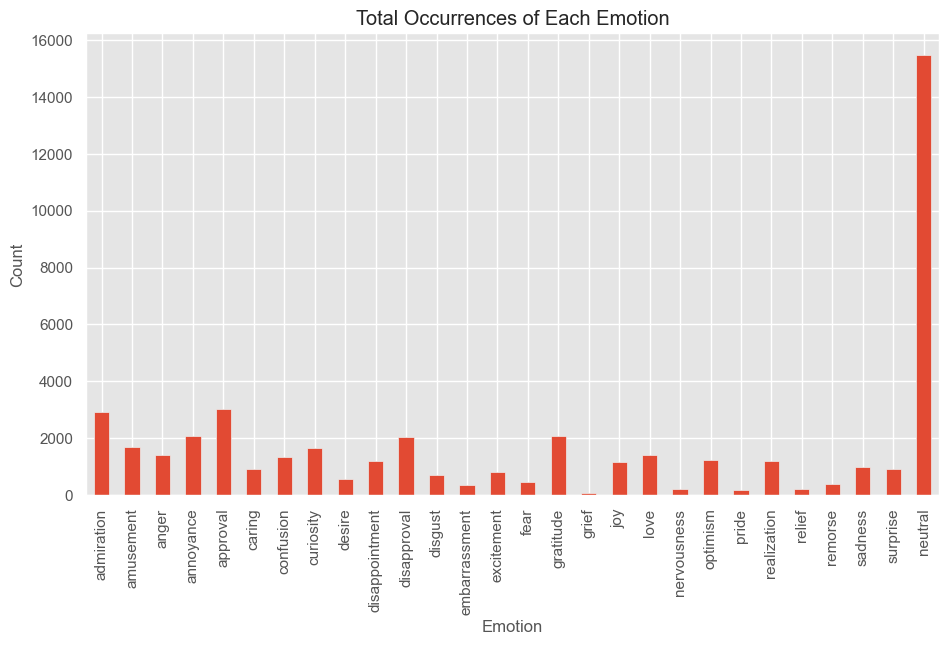

In [15]:
emotion_count = single_labeled_df.iloc[:,1:29].sum()
plt.figure(figsize=(11,6))
emotion_count.plot(kind='bar')
plt.title('Total Occurrences of Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

## Add a column 'emotion' to store emotion of each text

In [16]:
# Find the emotion for each row by identifying the column with value 1
single_labeled_df['emotion'] = single_labeled_df.loc[:, 'admiration':'neutral'].idxmax(axis=1)

In [17]:
single_labeled_df.sample(n=5, random_state=1)

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,num_emotions,emotion
22694,"Like at the time, he wasn't one of the best de...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,admiration
31008,Keep voting against your own interests. #maga!,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,desire
37313,Juve somehow still managed to get the upper ha...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,annoyance
45423,What a shame... she was passing really well to...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,embarrassment
27210,He just can't deal with the fact that he finds...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,disapproval


In [22]:
for col in single_labeled_df.columns:
    print(single_labeled_df[col].isna().value_counts())
    print('-' * 50)

text
False    46741
Name: count, dtype: int64
--------------------------------------------------
admiration
False    46741
Name: count, dtype: int64
--------------------------------------------------
amusement
False    46741
Name: count, dtype: int64
--------------------------------------------------
anger
False    46741
Name: count, dtype: int64
--------------------------------------------------
annoyance
False    46741
Name: count, dtype: int64
--------------------------------------------------
approval
False    46741
Name: count, dtype: int64
--------------------------------------------------
caring
False    46741
Name: count, dtype: int64
--------------------------------------------------
confusion
False    46741
Name: count, dtype: int64
--------------------------------------------------
curiosity
False    46741
Name: count, dtype: int64
--------------------------------------------------
desire
False    46741
Name: count, dtype: int64
----------------------------------------------

In [26]:
print(single_labeled_df['emotion'].unique().tolist())
print(len(single_labeled_df['emotion'].unique().tolist()))

['sadness', 'neutral', 'love', 'gratitude', 'disapproval', 'amusement', 'disappointment', 'realization', 'admiration', 'annoyance', 'confusion', 'optimism', 'excitement', 'caring', 'remorse', 'joy', 'approval', 'embarrassment', 'surprise', 'curiosity', 'anger', 'grief', 'disgust', 'pride', 'desire', 'relief', 'fear', 'nervousness']
28


## combine the 28 emotions into the 6 main emotions based on commonly used psychological categorizations

In [27]:
emotion_mapping = {
    # Joy-related emotions
    "joy": "joy",
    "love": "joy",
    "gratitude": "joy",
    "amusement": "joy",
    "excitement": "joy",
    "admiration": "joy",
    "approval": "joy",
    "pride": "joy",
    "optimism": "joy",
    "relief": "joy",
    
    # Sadness-related emotions
    "sadness": "sadness",
    "disappointment": "sadness",
    "grief": "sadness",
    "remorse": "sadness",
    "caring": "sadness",

    # Anger-related emotions
    "anger": "anger",
    "annoyance": "anger",
    "disapproval": "anger",
    "disgust": "anger",

    # Fear-related emotions
    "fear": "fear",
    "nervousness": "fear",
    "embarrassment": "fear",

    # Surprise-related emotions
    "surprise": "surprise",

    # Neutral or ambiguous emotions
    "neutral": "neutral",
    "confusion": "neutral",
    "curiosity": "neutral",
    "realization": "neutral",
    "desire": "neutral"
}


In [28]:

# Map the emotions to the main categories
single_labeled_df['main_emotion'] = single_labeled_df['emotion'].map(emotion_mapping)

single_labeled_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,pride,realization,relief,remorse,sadness,surprise,neutral,num_emotions,emotion,main_emotion
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,sadness,sadness
1,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,neutral,neutral
2,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,love,joy
3,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,neutral,neutral
4,Right? Considering it’s such an important docu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,gratitude,joy


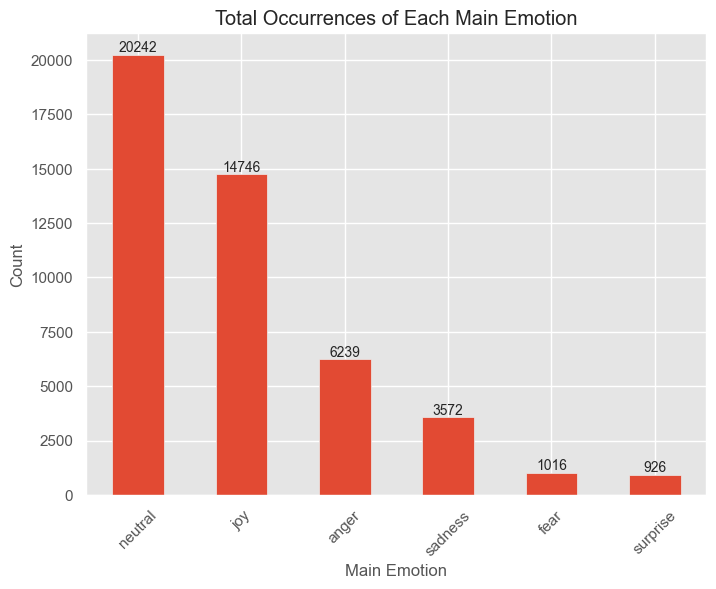

In [29]:
# Count occurrences of each main emotion
emotion_count = single_labeled_df['main_emotion'].value_counts()

# Plot the total occurrences of each main emotion
plt.figure(figsize=(8, 6))
ax = emotion_count.plot(kind='bar')
plt.title('Total Occurrences of Each Main Emotion')
plt.xlabel('Main Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()
plt.show()

In [30]:
single_labeled_df['main_emotion'].value_counts()

main_emotion
neutral     20242
joy         14746
anger        6239
sadness      3572
fear         1016
surprise      926
Name: count, dtype: int64

## Preprocessing Data

In [31]:
informal_to_formal = {
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "ain't": "is not",
    "lemme": "let me",
    "gimme": "give me",
    "kinda": "kind of",
    "sorta": "sort of",
    "coulda": "could have",
    "shoulda": "should have",
    "woulda": "would have",
    "cant": "cannot",
    "dont": "do not",
    "doesnt": "does not",
    "didnt": "did not",
    "havent": "have not",
    "hasnt": "has not",
    "hadnt": "had not",
    "wont": "will not",
    "wouldnt": "would not",
    "isnt": "is not",
    "arent": "are not",
    "aint": "is not",
    "wasnt": "was not",
    "werent": "were not",
    "shouldnt": "should not",
    "couldnt": "could not",
    "mightnt": "might not",
    "mustnt": "must not",
    "yall": "you all",
    "gotcha": "got you",
    "outta": "out of",
    "lotta": "lot of",
    "ain't": "is not",
    "y'all": "you all",
    "c'mon": "come on",
    "gotcha": "got you",
    "outta": "out of",
    "tryna": "trying to",
    "dunno": "do not know",
    "em": "them",
    "cuz": "because",
    "coz": "because",
    "cause": "because",
    "bout": "about",
    "ya": "you",
    "tho": "though",
    "thru": "through",
    "u": "you",
    "r": "are",
    "ur": "your",
    "pls": "please",
    "plz": "please",
    "ok": "okay",
    "idk": "i do not know",
    "tbh": "to be honest",
    "imo": "in my opinion",
    "idc": "i do not care",
    "lmk": "let me know",
    "smh": "shaking my head",
    "b4": "before",
    "thx": "thanks",
    "thanx": "thanks",
    "n't": "not",
    "'re": "are",
    "'s": "is",
    "'d": "would",
    "'ll": "will",
    "'t": "not",
    "'ve": "have",
    "'m": "am"
}

In [32]:
important_symbols = {
    # Positive Emoticons
    ":)", ":-)", ":D", ":-D", ":]", ":-]", ":>", ":3", ":^)", "xD", "XD", ":P", ":-P", ":p", ":-p", ":-*", ":*", ":o)", ":}","<3",

    # Negative Emoticons
    ":(", ":^(", ":-(", ":c", ":-c", ":<", ":-<", ":/", ":-/", ":|", ":-|", ":S", ":-S", ":'(", ":'-(", "D:", "D-:", ":-o", ":o",

    # Neutral or Other Emoticons
    ":o", ":-o", ":O", ":-O", "-_-", "-.-", "-__-", "^_^", "^__^", ":$", ":-$", ":@", ":-@", ":#", ":-#",

    # Winking or Playful
    ";)", ";-)", ";]", ";-]", ";P", ";-P", ";p", ";-p", ";D", ";-D",

    # Surprised or Shocked
    ":O", ":-O", ":o", ":-o", ":0", ":-0",

    # Angry or Frustrated
    ">:(", ">:-(", ">:O", ">:-O", "D:<", "D-:<", "D;", ">:|", ">:-|",

    # Sad or Crying
    ":'(", ":'-(", "T_T", "TT_TT", "Q_Q", "QQ",

    # Laughing or Happy
    "xD", "XD", "xDD", "XD", "lol", "LOL", ":')",

    # Heart and Love
    "<3", "💕", "💖", "💗", "💓", "💞", "💘", "❤️", "♥", "😍",

    # Crying or Sad Emojis
    "😭", "😢", "😥", "😔", "😟", "😞", "😩", "😫", "☹️", "🙁",

    # Laughing Emojis
    "😂", "🤣", "😹",

    # Positive Emojis
    "😊", "😄", "😁", "😃", "😀", "😌", "😉", "🙂", "😇",

    # Surprised or Shocked Emojis
    "😮", "😲", "😱", "🤯",

    # Angry Emojis
    "😠", "😡", "🤬", "😤",

    # Other Emojis
    "😎", "🤓", "😳", "🤔", "🤗", "🙄", "😴", "💩", "👻", "🎃", "🌟", "✨"
}


In [33]:
exclude_keywords = {
    # Negations
    "not", "no", "nor", "don't", "doesn't", "didn't", "isn't", "aren't",
    "wasn't", "weren't", "won't", "wouldn't", "can't", "couldn't", 
    "mightn't", "mustn't", "shan't",
    
    # Interrogative Words
    'what', 'who', 'why', 'how',
    
    # Adverbs for Emphasis
    'very', 'too', 'only',

    "you'd", 'doing', "you've", 'wouldn', 'couldn', "hadn't",
    'down', "you're", 'll', 'y', 've', 'weren', 't', 'own',
    "that'll", 'having', 'up', 'haven', 'd',
    "should've", "shouldn't", 'more', "you'll", 'off', 'than', 'didn',
    "needn't", "hasn't", 'most', 'needn', 'ain', "she's", 'shan',
    'shouldn', 'all', 'mustn', 'won', 'don', 'by', 'ma', "haven't",
    'aren', "it's", 'doesn', 'hadn', 'mightn', 'hasn', 'wasn', 'again',
    'm', 'out', 'isn', 's', 're'
    "ain't", "coulda","shoulda", "woulda",
    "cant", "dont", "doesnt", "didnt", "havent", "hasnt", "hadnt",
    "wont", "wouldnt", "isnt", "arent", "aint", "wasnt", "werent", "shouldnt",
    "couldnt", "mightnt", "mustnt", "yall", "ain't", "y'all", "em",
    "cuz", "coz", "cause", "ya", "u", "r", "ur", "ok", "thx",
    "thanx", "n't", "'re", "'s", "'d", "'ll", "'t", "'ve",
}

In [34]:
def expand_contractions(text):
    # Define contraction patterns
    contractions = {
        r"\bcan't\b": "cannot",
        r"\bwon't\b": "will not",
        r"\bshan't\b": "shall not",
        r"\baren't\b": "are not",
        r"\bwasn't\b": "was not",
        r"\bweren't\b": "were not",
        r"\bhasn't\b": "has not",
        r"\bhaven't\b": "have not",
        r"\bhadn't\b": "had not",
        r"\bdoesn't\b": "does not",
        r"\bdon't\b": "do not",
        r"\bdidn't\b": "did not",
        r"\bwouldn't\b": "would not",
        r"\bshouldn't\b": "should not",
        r"\bcouldn't\b": "could not",
        r"\bmightn't\b": "might not",
        r"\bmustn't\b": "must not",
        r"\bit's\b": "it is",
        r"\bthat's\b": "that is",
        r"\bwhat's\b": "what is",
        r"\bwho's\b": "who is",
        r"\bwhere's\b": "where is",
        r"\bwhen's\b": "when is",
        r"\bwhy's\b": "why is",
        r"\bhow's\b": "how is",
        r"\byou're\b": "you are",
        r"\bwe're\b": "we are",
        r"\bthey're\b": "they are",
        r"\bi'm\b": "i am",
        r"\bi've\b": "i have",
        r"\byou've\b": "you have",
        r"\bwe've\b": "we have",
        r"\bthey've\b": "they have",
        r"\bi'll\b": "i will",
        r"\byou'll\b": "you will",
        r"\bwe'll\b": "we will",
        r"\bthey'll\b": "they will",
        r"\bi'd\b": "i would",
        r"\byou'd\b": "you would",
        r"\bhe'd\b": "he would",
        r"\bshe'd\b": "she would",
        r"\bwe'd\b": "we would",
        r"\bthey'd\b": "they would",
        r"\bthere's\b": "there is",
        r"\bhere's\b": "here is"
    }

    # Apply contraction patterns
    for pattern, replacement in contractions.items():
        text = re.sub(pattern, replacement, text)

    return text

In [35]:
def preprocess_text(text):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Remove excluded keywords from stopwords
    stop_words -= exclude_keywords
    
    # Step 1: Remove words surrounded by brackets []
    text = re.sub(r"\[.*?\]", "", text)  # Remove anything inside brackets and the brackets themselves
    #print(f"Text after removing bracketed words: {text}")  # Debug bracket removal

    # Step 2: Lowercase the text
    text = text.lower()
    #print(f"Lowercased text: {text}")  # Debug lowercasing

    # Step 3: Expand contractions
    text = expand_contractions(text)  # Handle standard contractions
    #print(f"Text after expanding contractions: {text}")

    # Step 4: Handle informal phrases using regex
    pattern = re.compile(r'\b(' + '|'.join(map(re.escape, informal_to_formal.keys())) + r')\b')
    text = pattern.sub(lambda match: informal_to_formal[match.group(0)], text)
    #print(f"Text after informal phrase handling: {text}")

    # Step 5: Tokenize the text, preserving important symbols and words
    tokens = re.findall(r"<3|:\^\(|:[dDpP\)\(]|;[\)\(]|:-[\)\(pP]|[a-zA-Z]+|[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]", text)
    #print(f"Tokenized text: {tokens}")

    # Step 6: Handle duplicate characters and emojis
    reduced_tokens = []
    for token in tokens:
        if re.match(r"[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]", token):  # If it's an emoji
            if token not in reduced_tokens:  # Keep only the first occurrence
                reduced_tokens.append(token)
        else:  # For regular words
            reduced_tokens.append(re.sub(r"(.)\1{2,}", r"\1", token))  # Replace repeated letters
    #print(f"Reduced tokens: {reduced_tokens}")

    # Step 7: Remove stopwords but retain excluded keywords and important symbols
    filtered_tokens = [
        token for token in reduced_tokens
        if token in important_symbols or token not in stop_words
    ]
    #print(f"Filtered tokens: {filtered_tokens}")

    # Step 8: Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    #print(f"Lemmatized tokens: {lemmatized_tokens}")

    # Step 9: Remove single-character tokens
    lemmatized_tokens = [token for token in lemmatized_tokens if len(token) > 1 ]

    # Step 10: Rejoin tokens into a cleaned string
    final_text = ' '.join(lemmatized_tokens)

    return final_text

## Cleaning the text data

In [36]:
# Apply preprocessing
single_labeled_df['cleaned_text'] = single_labeled_df['text'].apply(preprocess_text)

#### Reset index and save clean data

In [29]:
# drop unnecessary columns
single_labeled_df = single_labeled_df.drop(single_labeled_df.columns[1:29], axis=1)
single_labeled_df = single_labeled_df.drop(columns=['emotion', 'num_emotions'], axis=1)
# save clean data
#single_labeled_df.to_csv('GoEmotion_clean_data.csv', index=False)

In [30]:
single_labeled_df.head()

,text,main_emotion,cleaned_text
0,Yes - thank you for stating it this way - perf...,joy,yes thank stating way perfectly said
1,Yeah...it's difficult to have sympathy for som...,neutral,yeah difficult sympathy someone like
2,It looks like a quail egg and it’s actually on...,neutral,look like quail egg actually plate weird looki...
3,This is why I stopped watching. :( The brutali...,anger,why stopped watching :( brutality disgusting
4,"Anyone can edit those pages, so I wouldn't get...",joy,anyone edit page would not get too excited by ...


In [31]:
# save clean data
single_labeled_df.to_csv('GoEmotion_clean_data_simplified.csv', index=False)